<a href="https://colab.research.google.com/github/SowmyaDontha88/Python/blob/main/Fraud_check_Using_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
import seaborn as sns

# **Business Problem--> Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [105]:
Data = pd.read_csv("/content/Fraud_check.csv")

# **EDA**

In [106]:
Data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [107]:
Data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [108]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [109]:
Data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [110]:
Data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

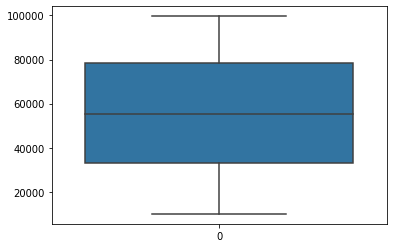

In [111]:
sns.boxplot(Data['Taxable.Income'])
plt.show()

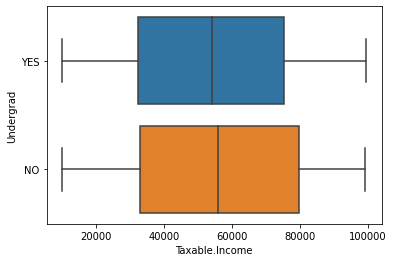

In [112]:
sns.boxplot(data=Data, x='Taxable.Income',y='Undergrad',order =["YES","NO"])
plt.show()

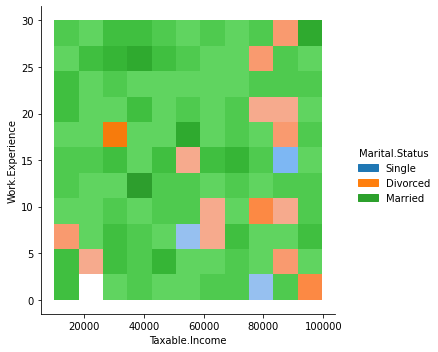

In [113]:
sns.displot(data=Data,x="Taxable.Income",y="Work.Experience",hue ="Marital.Status")
plt.show()

In [114]:
import warnings
warnings.filterwarnings('ignore')

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


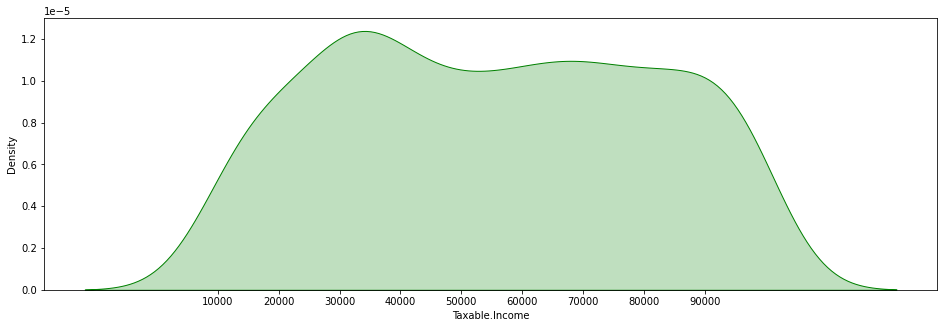

In [115]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(Data['Taxable.Income'].skew()))
print("Kurtosis: {}".format(Data['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(Data['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

From the above graph we can say that data is right skewed and has negative kurtosis

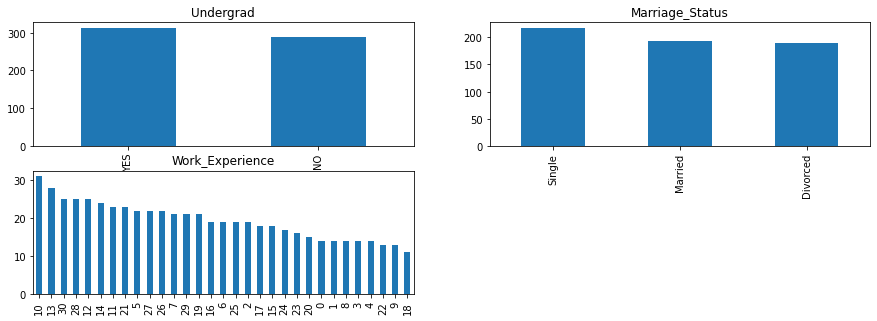

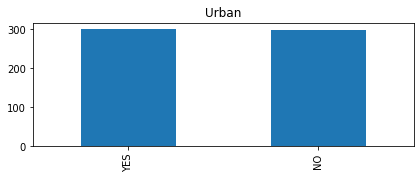

In [116]:
plt.figure(1) 
plt.subplot(221)
Data['Undergrad'].value_counts().plot.bar(figsize=(15,5),title='Undergrad')
plt.subplot(222)
Data['Marital.Status'].value_counts().plot.bar(figsize=(15,5),title='Marriage_Status')
plt.subplot(223)
Data['Work.Experience'].value_counts().plot.bar(figsize=(15,5),title='Work_Experience')
plt.show( )
plt.subplot(224)
Data['Urban'].value_counts().plot.bar(figsize=(15,5),title='Urban')
plt.show( )

In [117]:
Data = pd.get_dummies(Data, columns=['Urban','Undergrad','Marital.Status'])
Data.head()

,Taxable.Income,City.Population,Work.Experience,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,0,1,1,0,0,0,1
1,33700,134075,18,0,1,0,1,1,0,0
2,36925,160205,30,0,1,1,0,0,1,0
3,50190,193264,15,0,1,0,1,0,0,1
4,81002,27533,28,1,0,1,0,0,1,0


# Finding correlation between variables

In [118]:
corr = Data.corr()

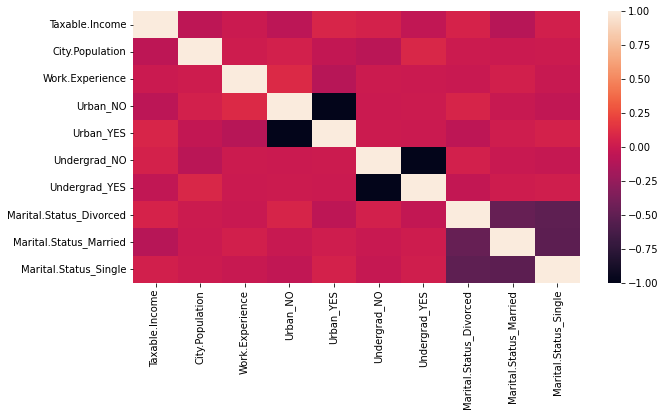

In [119]:
plt.figure(figsize=(10,5))
sns.heatmap(corr)
plt.show()

In [120]:
Data['Taxable.Income'].max()

99619

Creating bins according to the Taxable.Income value into 2 labels, "Good,Risky"

In [121]:
Data['Taxable.Income']=pd.cut(Data['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])

In [122]:
Data.head()

,Taxable.Income,City.Population,Work.Experience,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,Good,50047,10,0,1,1,0,0,0,1
1,Good,134075,18,0,1,0,1,1,0,0
2,Good,160205,30,0,1,1,0,0,1,0
3,Good,193264,15,0,1,0,1,0,0,1
4,Good,27533,28,1,0,1,0,0,1,0


In [123]:
Data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# **Label Encoding**
# Encoding 0 - Good
# Encoding 1 - Risky

In [134]:
label_encoder = preprocessing.LabelEncoder()
Data['Taxable.Income']= label_encoder.fit_transform(Data['Taxable.Income']) 
Data

,Taxable.Income,City.Population,Work.Experience,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,0,1,1,0,0,0,1
1,0,134075,18,0,1,0,1,1,0,0
2,0,160205,30,0,1,1,0,0,1,0
3,0,193264,15,0,1,0,1,0,0,1
4,0,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,0,1,1,0,0
596,0,55369,2,0,1,0,1,1,0,0
597,0,154058,0,0,1,1,0,1,0,0
598,0,180083,17,1,0,0,1,0,1,0


In [124]:
X = Data.iloc[:,1:10]
Y = Data.iloc[:,0]

In [125]:
X.columns

Index(['City.Population', 'Work.Experience', 'Urban_NO', 'Urban_YES',
       'Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single'],
      dtype='object')

In [135]:
Y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Taxable.Income, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [138]:
X_train.shape

(480, 9)

In [139]:
X_test.shape

(120, 9)

In [140]:
Y_train.shape

(480,)

In [141]:
Y_test.shape

(120,)

# **Building Decision Tree Classifier**

In [145]:
model = DecisionTreeClassifier(criterion ='entropy',max_depth=4)

In [146]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

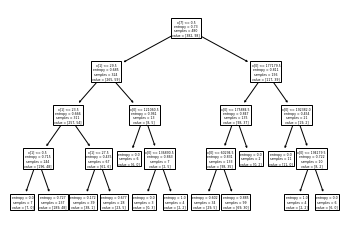

In [147]:
tree.plot_tree(model);

In [150]:
text = tree.export_text(model,max_depth=4)  
print(text)

|--- feature_7 <= 0.50
|   |--- feature_1 <= 29.50
|   |   |--- feature_1 <= 23.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: Good
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: Good
|   |   |--- feature_1 >  23.50
|   |   |   |--- feature_1 <= 27.50
|   |   |   |   |--- class: Good
|   |   |   |--- feature_1 >  27.50
|   |   |   |   |--- class: Good
|   |--- feature_1 >  29.50
|   |   |--- feature_0 <= 121060.50
|   |   |   |--- class: Good
|   |   |--- feature_0 >  121060.50
|   |   |   |--- feature_0 <= 136890.50
|   |   |   |   |--- class: Risky
|   |   |   |--- feature_0 >  136890.50
|   |   |   |   |--- class: Good
|--- feature_7 >  0.50
|   |--- feature_0 <= 177179.50
|   |   |--- feature_0 <= 175884.50
|   |   |   |--- feature_0 <= 60294.50
|   |   |   |   |--- class: Good
|   |   |   |--- feature_0 >  60294.50
|   |   |   |   |--- class: Good
|   |   |--- feature_0 >  175884.50
|   |   |   |--- class: Risky
|   |--- feature_0 >  177179.50
| 

In [151]:
model.feature_importances_ 

array([0.63011368, 0.31217174, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05771458, 0.        ])

In [155]:
fn=['City.Population', 'Work.Experience', 'Urban_NO', 'Urban_YES',
       'Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single']
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population            0.630114
Work.Experience            0.312172
Marital.Status_Married     0.057715
Urban_NO                   0.000000
Urban_YES                  0.000000
Undergrad_NO               0.000000
Undergrad_YES              0.000000
Marital.Status_Divorced    0.000000
Marital.Status_Single      0.000000
dtype: float64

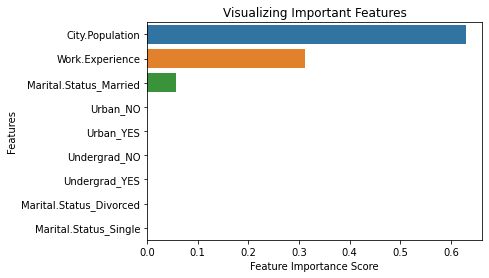

In [156]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

As the above graph shows the City population, Work Experience and Marital Status are the important features of our classifier

In [160]:
predict = model.predict(X_test)

In [164]:
accuracy = accuracy_score(Y_test,predict)
accuracy

0.7833333333333333

# **After predicting the model, the accuracy found out to be 78%**

In [165]:
from sklearn.metrics import confusion_matrix

In [168]:
confusion_matrix(Y_test,predict)

array([[94,  0],
       [26,  0]])

# **Building DecisionTreeClassifier using Gini index**

In [176]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [177]:
model_gini.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=3)

In [178]:
model_gini.feature_importances_ 

array([0.68086514, 0.22492929, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09420556, 0.        ])

In [179]:
fn_gini =['City.Population', 'Work.Experience', 'Urban_NO', 'Urban_YES',
       'Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single']
feature_imp_gini = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp_gini

City.Population            0.680865
Work.Experience            0.224929
Marital.Status_Married     0.094206
Urban_NO                   0.000000
Urban_YES                  0.000000
Undergrad_NO               0.000000
Undergrad_YES              0.000000
Marital.Status_Divorced    0.000000
Marital.Status_Single      0.000000
dtype: float64

In [180]:
predict_gini = model_gini.predict(X_test)

In [181]:
accuracy_gini = accuracy_score(Y_test,predict_gini)
accuracy_gini

0.775

# **Using Gini index cirterion, the accuracy got decreased by 1%**

In [183]:
from sklearn.model_selection import GridSearchCV

In [199]:
params = {'criterion':['gini', 'entropy'],'max_depth' : range(1,10)}
              

# **Using GridSearchCV**

In [200]:
grid = GridSearchCV(model,param_grid=params,cv=3,verbose=0)

In [201]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [207]:
print("Best Estimator:{}".format(grid.best_estimator_))
print("best Tunning parameters :{} ".format(grid.best_params_))
print("Highest accuracy :{}".format(grid.best_score_))

Best Estimator:DecisionTreeClassifier(max_depth=1)
best Tunning parameters :{'criterion': 'gini', 'max_depth': 1} 
Highest accuracy :0.7958333333333334


With GridSearchCV from sklearn model , the best accuracy can be achieved by using Gini index and max_depth = 1,i.e around 80%